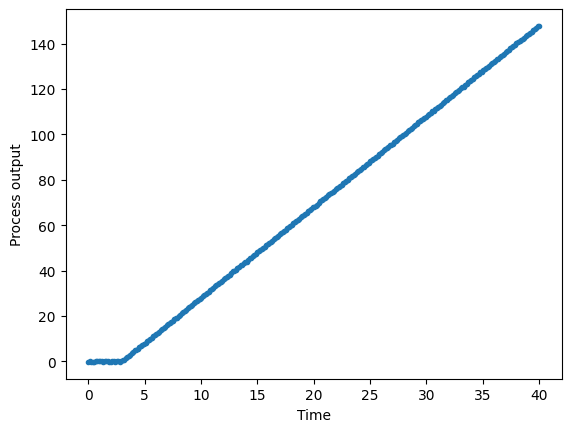

Kp = 3.99961830920463, theta = 2.9969698154584594


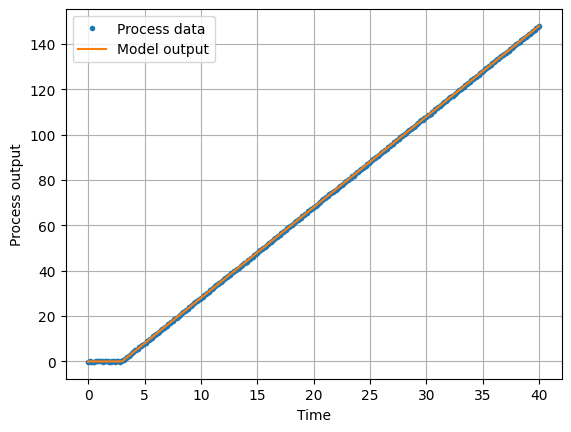

In [1]:
# Identification of integrator model with time delay from noisy process data
# Seshu Damarla, 29 Nov. 2024
# Reference: Process Control: Modelling, Simulation and Control by B. W. Bequette
# Chemical Process Control An Introduction to Theory and Practice - George Stephanopoulos

"""
Second-order transfer function with time delay:
    G(s) = Kp / (s) * e^(-s*Θ)
    t: time
    Kp: system gain
    Θ: time delay     """

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

# define response of integrator with time delay to a step change in input
def integrator_with_delay(t,Kp,theta):
    A = 1 # magnitude of step change in input
    ymodel = np.zeros_like(t)
    for i,time in enumerate(t):
        if time >= theta:
            ymodel[i] = A*Kp*(time-theta)
    return ymodel

# generate process data
t = np.linspace(0,40,300)
A = 1 # magnitude of step change in input
Kp_true, theta_true = 4, 3
process_data = integrator_with_delay(t,Kp_true,theta_true)
process_data += np.random.normal(0,0.1,len(t))

plt.plot(t,process_data,'o',markersize = 3)
plt.xlabel('Time')
plt.ylabel('Process output')
plt.show()

# Identify the FOPTD model from the process data
initial_guess = [1,1]
params, params_covariance = curve_fit(integrator_with_delay,t,process_data,p0= initial_guess)
Kp_est, theta_est = params
print(f'Kp = {Kp_est}, theta = {theta_est}')

# generate response of the process model
ymodel = integrator_with_delay(t,Kp_est,theta_est)

# compare process data with model output
plt.plot(t,process_data,'o',markersize = 3,label = 'Process data')
plt.plot(t,ymodel,label = 'Model output')
plt.xlabel('Time')
plt.ylabel('Process output')
plt.legend()
plt.grid()
plt.show()
